In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# read data
df = pd.read_csv(r'C:\Users\yuyan\Desktop\Science 2C00\Projects\Movie Correlation Project\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# loop through the data to see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(pct_missing)

# identify rows where 'released' is NaN
bool_series = pd.isnull(df["released"])
# filter the dataframe to display only rows where bool_series is True.
df_null_released = df[bool_series]
df_null_released
###

0.0
0.010041731872717789
0.0
0.0
0.0002608242044861763
0.0003912363067292645
0.0003912363067292645
0.0
0.0003912363067292645
0.00013041210224308815
0.0003912363067292645
0.2831246739697444
0.02464788732394366
0.002217005738132499
0.0005216484089723526


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [6]:
# removes any duplicate rows
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [7]:
# df['yearcorrected'] = df['released'].str.extract(r'(\b\d{4}\b)').astype('int64') doesn't work because of the 
df['yearcorrected'] = df['released'].str.extract(r'(\b\d{4}\b)').astype('Int64')


<Axes: xlabel='budget', ylabel='gross'>

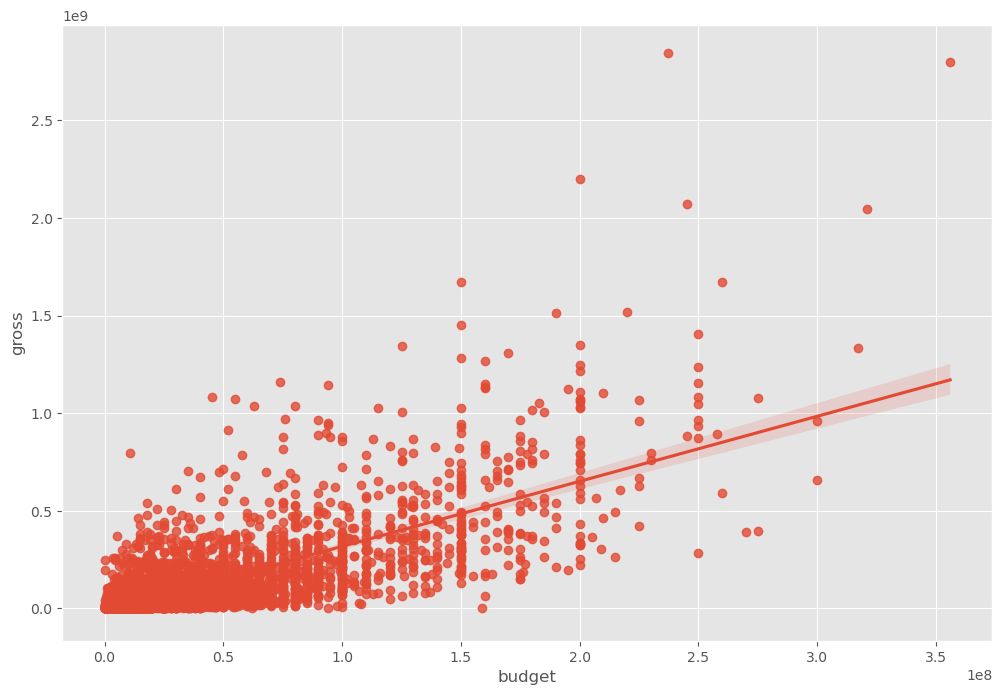

In [8]:
sns.regplot(x="budget", y="gross", data=df)

<Axes: xlabel='votes', ylabel='gross'>

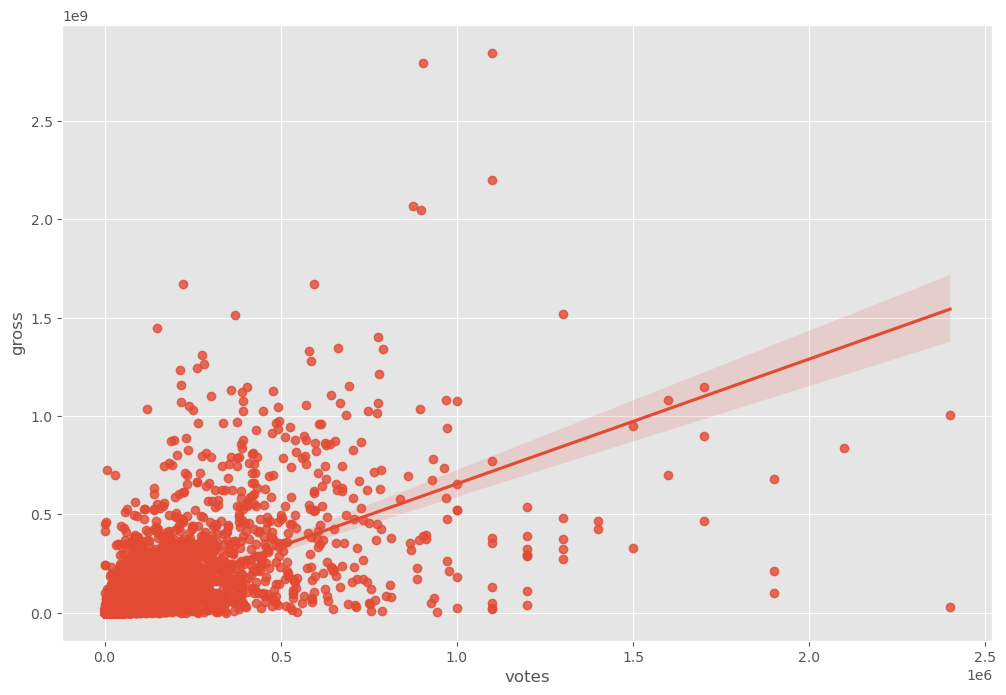

In [9]:
sns.regplot(x="votes", y="gross", data=df)

<Axes: xlabel='score', ylabel='gross'>

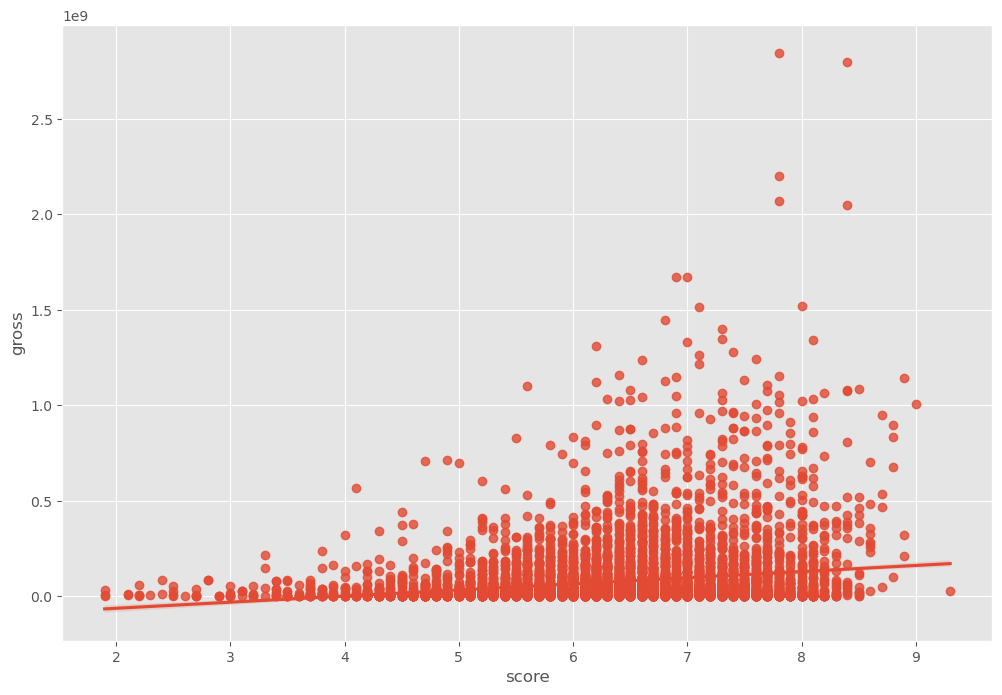

In [10]:
sns.regplot(x="score", y="gross", data=df)

In [11]:
df.corr(numeric_only = True)

,year,score,votes,budget,gross,runtime,yearcorrected
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,0.997415
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.105994
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.218429
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.321918
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.250514
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.120636
yearcorrected,0.997415,0.105994,0.218429,0.321918,0.250514,0.120636,1.000000


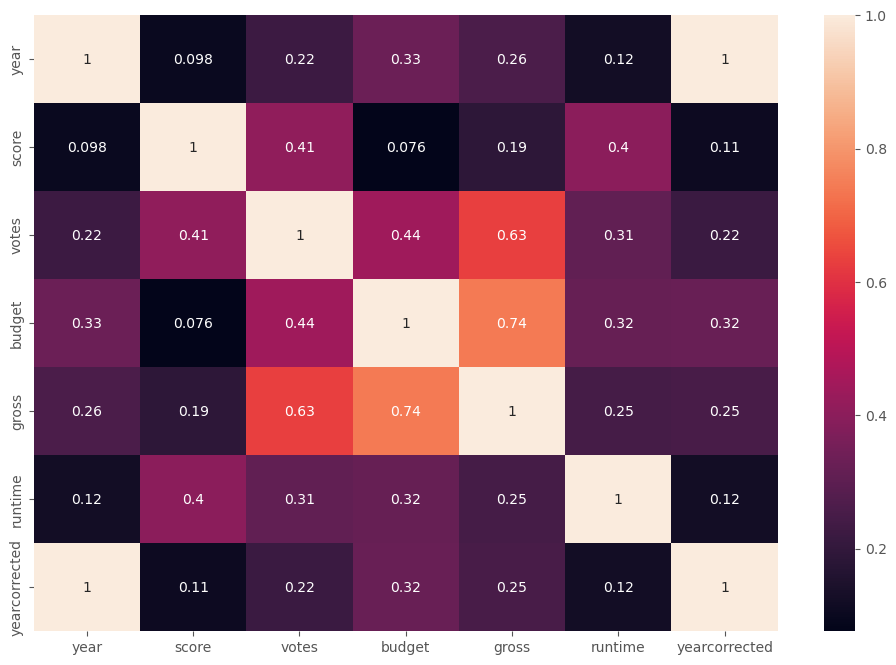

In [12]:
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)

plt.show()

In [13]:
corr_pairs = correlation_matrix.unstack()

sorted_corr = corr_pairs.sort_values()

sorted_corr

budget         score            0.076254
score          budget           0.076254
year           score            0.097995
score          year             0.097995
               yearcorrected    0.105994
yearcorrected  score            0.105994
               runtime          0.120636
runtime        yearcorrected    0.120636
year           runtime          0.120811
runtime        year             0.120811
gross          score            0.186258
score          gross            0.186258
yearcorrected  votes            0.218429
votes          yearcorrected    0.218429
               year             0.222945
year           votes            0.222945
gross          runtime          0.245216
runtime        gross            0.245216
gross          yearcorrected    0.250514
yearcorrected  gross            0.250514
year           gross            0.257486
gross          year             0.257486
runtime        votes            0.309212
votes          runtime          0.309212
runtime        b

In [14]:
strong_corr = sorted_corr[abs(sorted_corr) > 0.6]

strong_corr

votes          gross            0.630757
gross          votes            0.630757
budget         gross            0.740395
gross          budget           0.740395
yearcorrected  year             0.997415
year           yearcorrected    0.997415
               year             1.000000
budget         budget           1.000000
gross          gross            1.000000
votes          votes            1.000000
score          score            1.000000
runtime        runtime          1.000000
yearcorrected  yearcorrected    1.000000
dtype: float64